In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [17]:
E_commerce_data = pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [18]:
E_commerce_data

,Timestamp,Age,Gender,Highest Educational Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [19]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "Do you generally find various alternatives for the same product in your affordable range?":"C_service"}, axis = 1)

In [20]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",C_service,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [21]:
data = pd.DataFrame(columns=["C_service","subscription","Gender"])

In [22]:
data['Gender']=E_commerce_data['Gender']
data['C_service']=E_commerce_data.C_service
data['subscription']=E_commerce_data['Age']

In [23]:
data

,C_service,subscription,Gender
0,Yes,21,Male
1,Yes,21,Male
2,Yes,21,Male
3,Yes,21,Male
4,Yes,21,Male
...,...,...,...
107,Yes,17,Male
108,Yes,17,Female
109,Yes,19,Female
110,Yes,21,Male


In [24]:
data1=data.groupby(['C_service','Gender']).count()

In [25]:
data1

subscription
C_service Gender              
No        Female             3
          Male              10
Yes       Female            31
          Male              68

In [26]:
data1

subscription
C_service Gender              
No        Female             3
          Male              10
Yes       Female            31
          Male              68

In [27]:
data2 = pd.DataFrame(columns=["C_service","gender"])
row_list = []
for i,j in data1.index:
    dict1 = {}
    dict1.update({"C_service": i, "gender":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1    

,C_service,gender
0,No,Female
1,No,Male
2,Yes,Female
3,Yes,Male


In [28]:
df1['Affordability']=list(data1.subscription)

In [29]:
df1

,C_service,gender,Affordability
0,No,Female,3
1,No,Male,10
2,Yes,Female,31
3,Yes,Male,68


In [30]:
df1['Percentage']=df1.groupby("C_service").transform(lambda x: (x*100)/x.sum())

In [31]:
df1

,C_service,gender,Affordability,Percentage
0,No,Female,3,23.076923
1,No,Male,10,76.923077
2,Yes,Female,31,31.313131
3,Yes,Male,68,68.686869


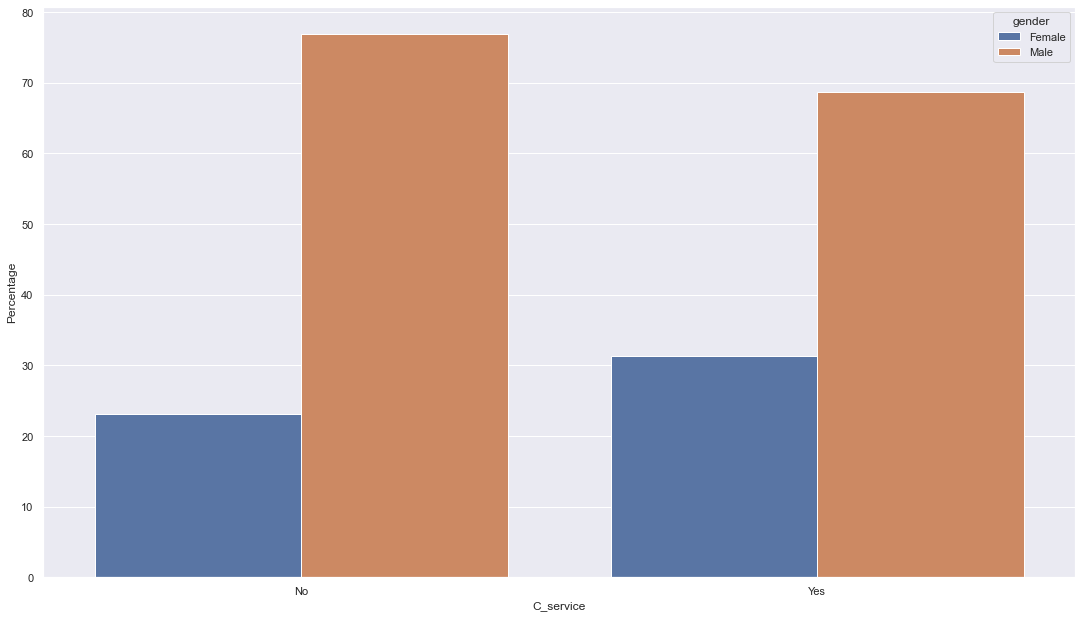

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
sns.barplot(x = 'C_service', y = 'Percentage',
           data = df1,
           hue = 'gender')
fig.savefig('10.png',facecolor='lightgrey',transparent=True)